In [58]:
import pandas as pd
import numpy as np
from IPython.display import display
from pathlib import Path
from ipywidgets import widgets
from pandas_profiling import ProfileReport 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
data = pd.read_csv('C:/Users/Admin/Desktop/ironhack_case/technical_challenge_DA/data/measurements.csv')


In [60]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [61]:
data['distance']=data['distance'].str.replace(',','.').astype(float)
data['consume']=data['consume'].str.replace(',','.').astype(float)
data['temp_inside']=data['temp_inside'].str.replace(',','.').astype(float)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [67]:
data.columns = data.columns.str.lower()

In [71]:
data.columns = data.columns.str.replace(' ', '_')

In [72]:
data.shape

(388, 12)

# Understanding the Columns

distance: Distance traveled (km).

consume: Fuel consumption (L/100 km).

speed: Average speed (km/h ?).

temp_inside: Set temperature inside the car (deg-C ?). 

temp_outside: Outside temperature measured at the end of operation (deg-C).


specials: Specials. rain" for rain, "snow" for snow, "climatization (air-conditioning?)" when using "temp_inside", 
"temp_outside", "temp_inside", and "temp_inside". AC" when climatization (air conditioning?) is used.

gas_type: The type of gasoline selected at the last refueling.

AC: 1 - climatization (air conditioning?) was used. was used. / 0 - not used.

rain: 1 - rain or snowfall. / 0 - none.

sun: 1 - sunny and warm. / 0 - other.


In [73]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

# I would be taking down the columns "specials, refill liters and refill gas" due to high amount of missing data

In [74]:
data=data.drop(['specials','refill_liters','refill_gas'],axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [79]:
med = data['temp_inside'].median()

# Print the median value
print("Median:", med)

Median: 22.0


In [80]:
value_counts = data['temp_inside'].value_counts()

print(value_counts)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64


# Since it has low missing values, i would fill it with the median.

In [81]:
data['temp_inside'].fillna(med, inplace=True)

In [86]:
# TO confirm that there are no missing values

rows_with_missing = data[data.isnull().any(axis=1)]

# Print the rows with missing values
print(rows_with_missing)

Empty DataFrame
Columns: [distance, consume, speed, temp_inside, temp_outside, gas_type, ac, rain, sun]
Index: []


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [83]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [84]:
profile = ProfileReport(data)

In [85]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# showing the relationship between two variables.

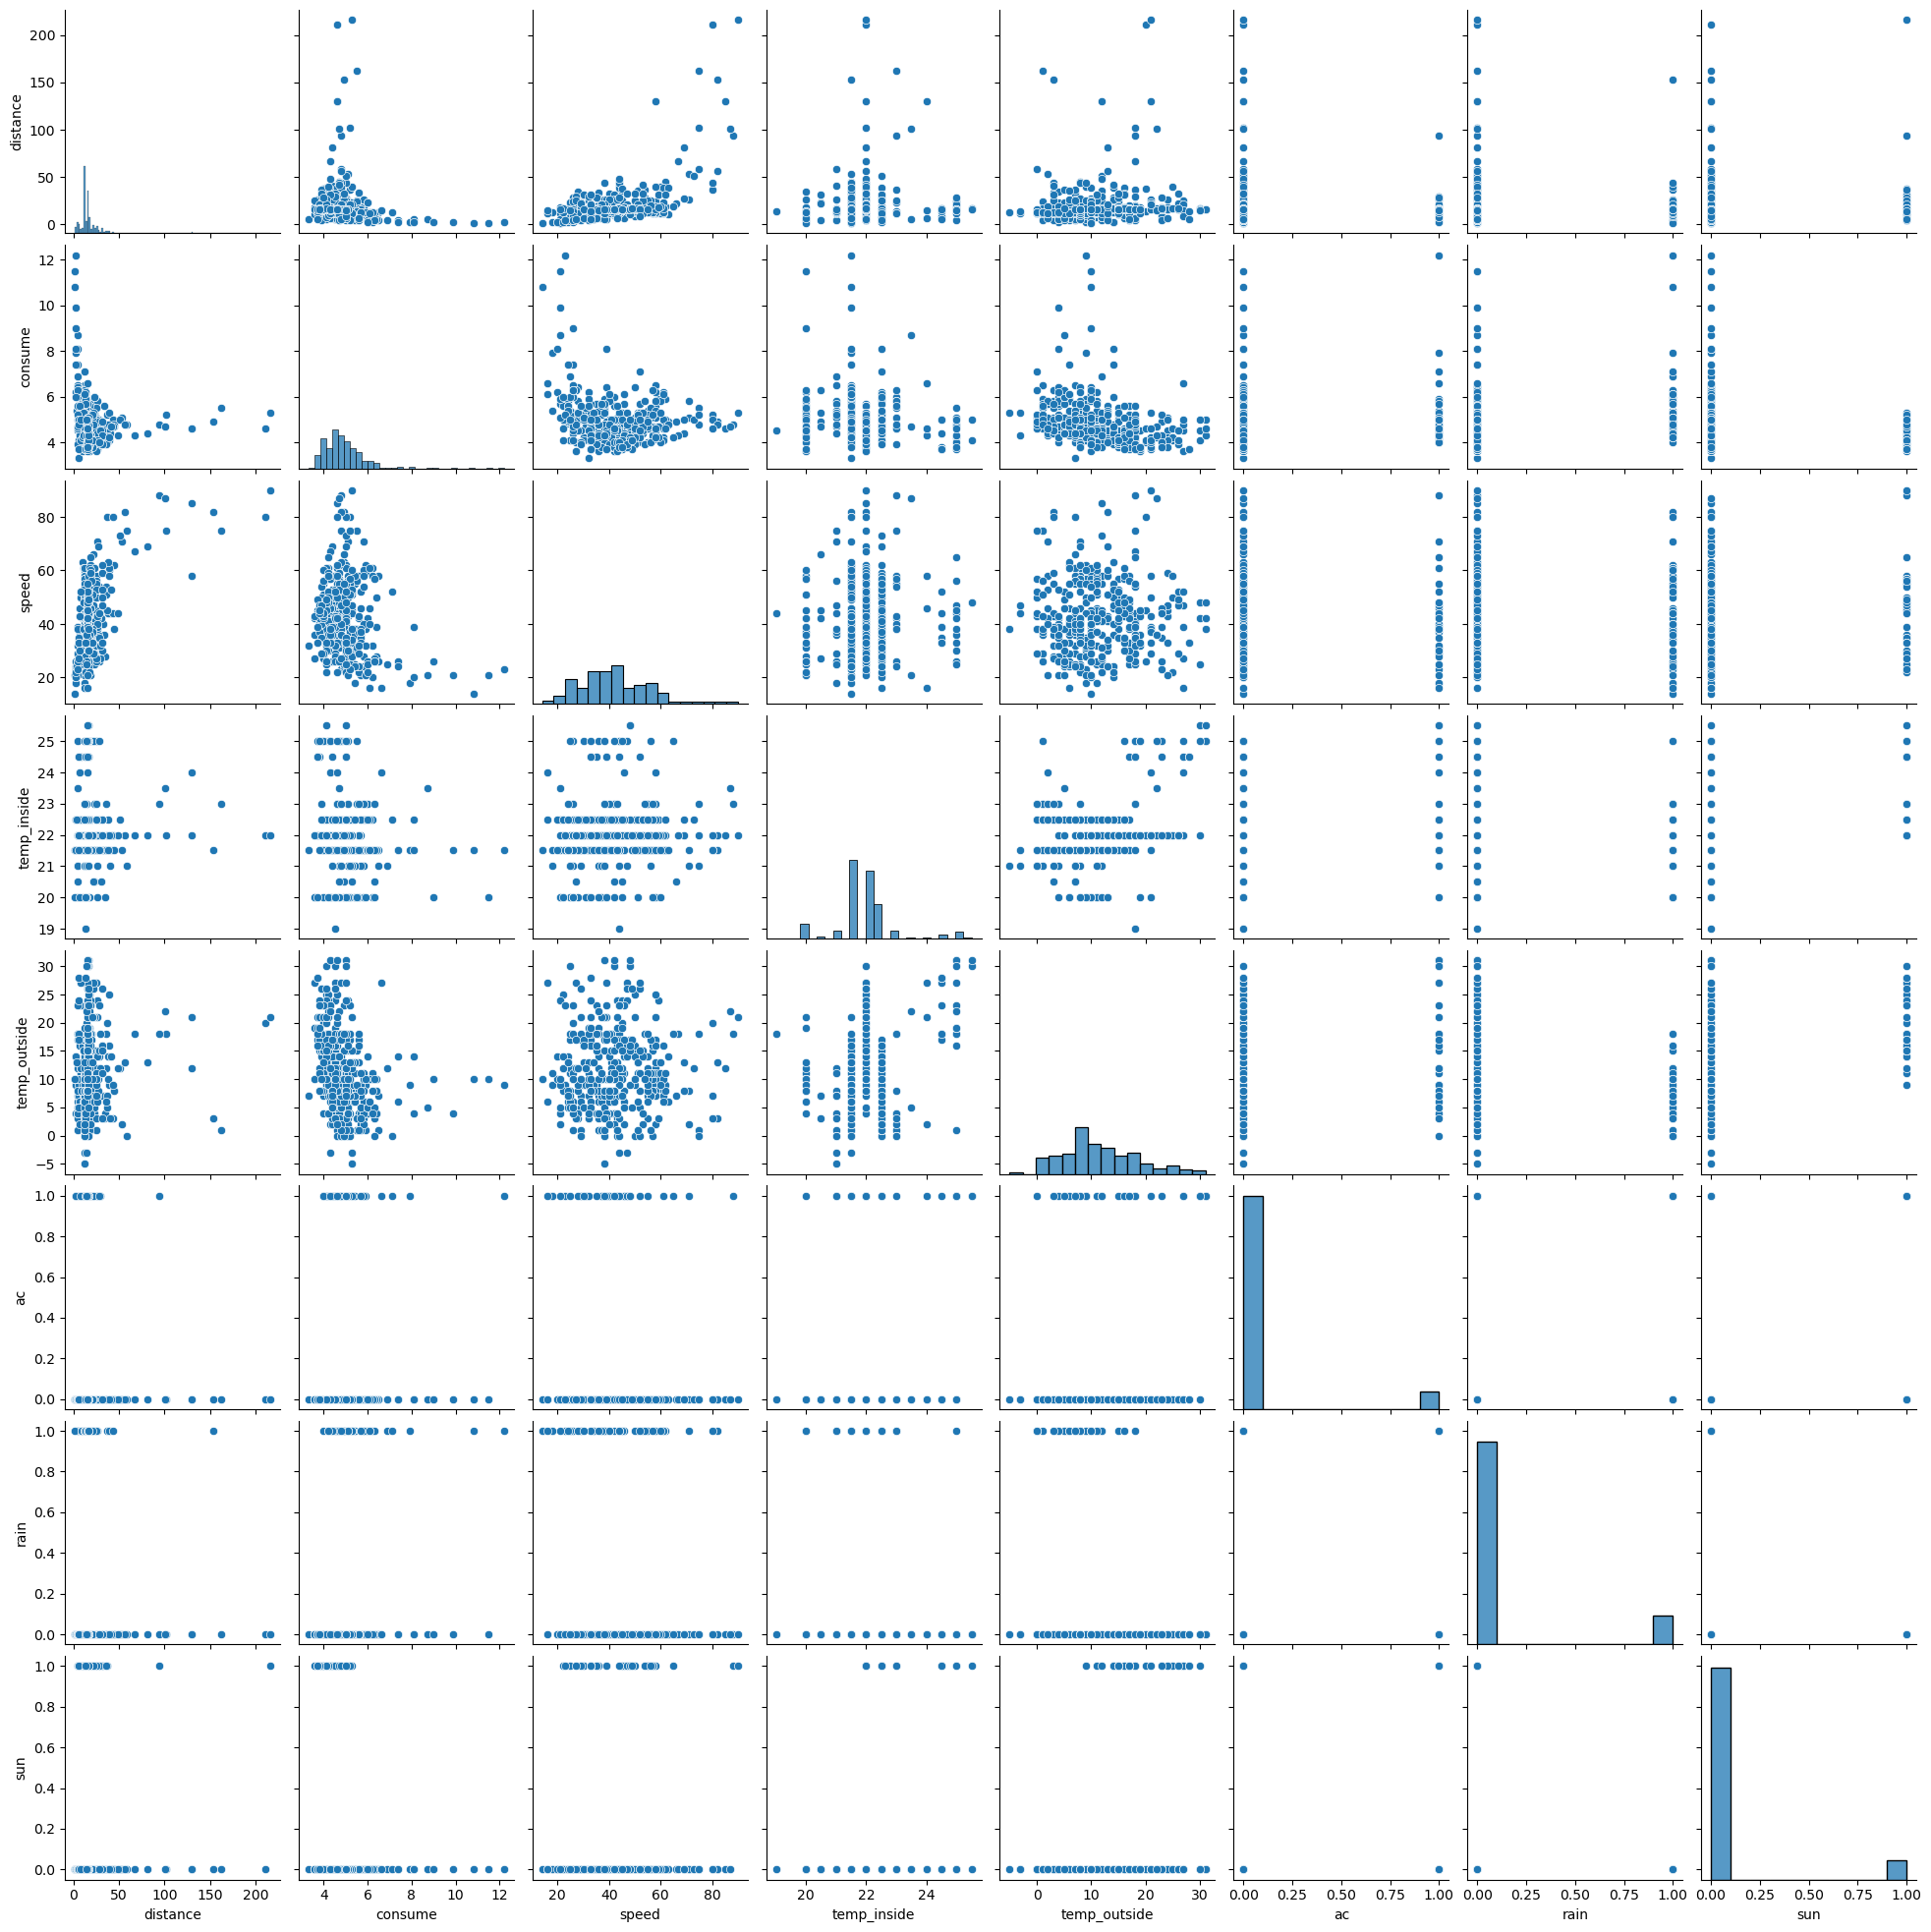

In [87]:
sns.pairplot(data)
plt.show()

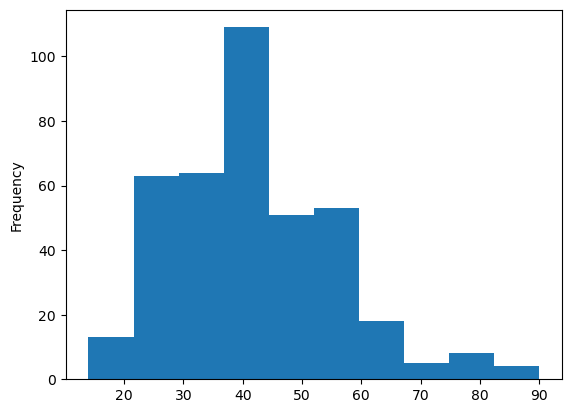

In [88]:
data['speed'].plot.hist()
plt.show()

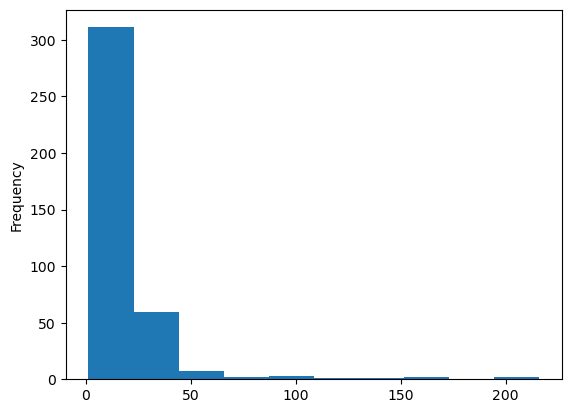

In [89]:
data['distance'].plot.hist()
plt.show()

# Fuel consumption acc to AC

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


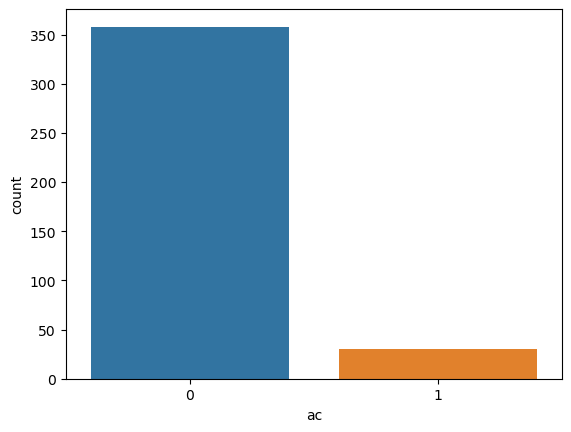

In [90]:
sns.countplot(data['ac'])
plt.show()

# Fuel consumption acc to maximum distance travel

In [91]:
maxd=data.query('distance==216.100000')
maxd

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
319,216.1,5.3,90,22.0,21,SP98,0,0,1


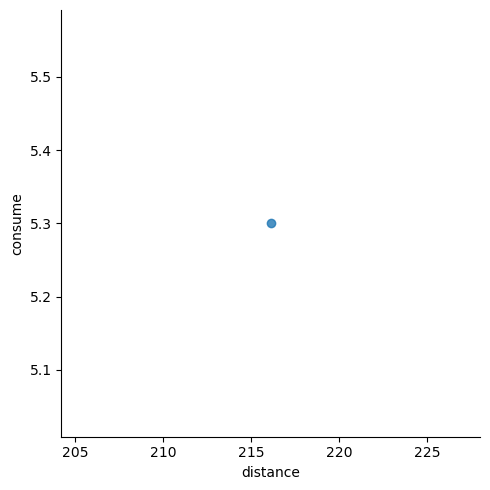

In [93]:
sns.lmplot(x='distance', y='consume', data=maxd)
plt.show()

# Fuel consumption acc to minimum distance travel

In [95]:
mind=data.query('distance==1.300000')
mind


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
210,1.3,11.5,21,20.0,10,SP98,0,0,0


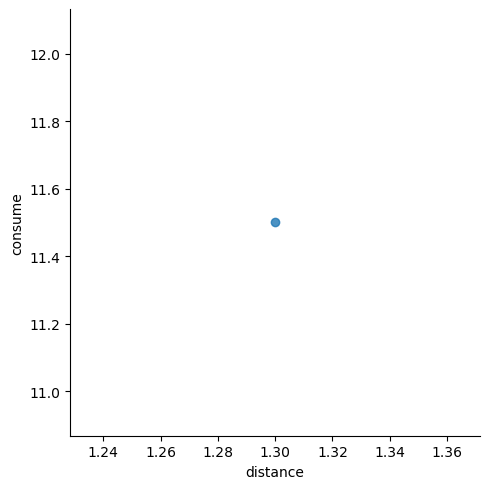

In [96]:
sns.lmplot(x = 'distance', y ='consume',data=mind)
plt.show()

# Fuel Consumption acc to maximum speed

In [98]:
maxs=data.query('speed==90.000000')
maxs


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
319,216.1,5.3,90,22.0,21,SP98,0,0,1


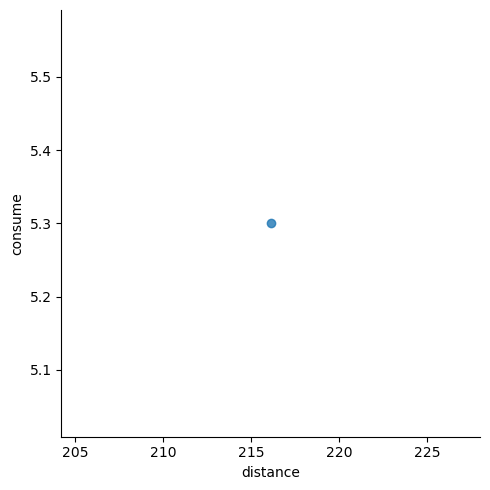

In [99]:
sns.lmplot(x = 'distance',y = 'consume',data=maxs)
plt.show()


# Fuel consumption acc to minimum speed

In [101]:
mins=data.query('speed==14.000000')
mins

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
147,1.7,10.8,14,21.5,10,E10,0,1,0


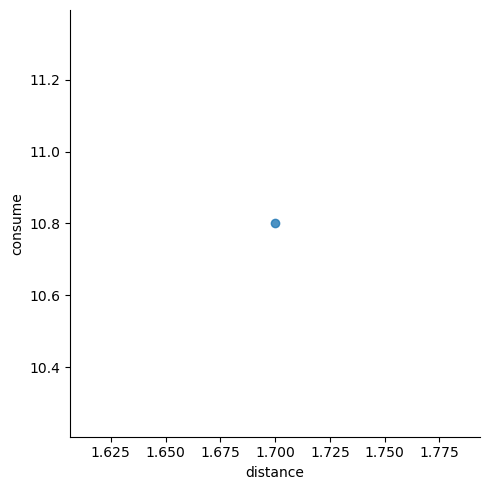

In [102]:
sns.lmplot(x = 'distance', y = 'consume',data=mins)
plt.show()

# Minumum fuel consume with AC

In [104]:
minac=data.query('ac==0.000000')
minac

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
380,8.3,5.0,52,24.5,27,SP98,0,0,0
381,5.5,3.7,33,24.5,28,SP98,0,0,1
382,13.6,3.7,33,24.5,28,SP98,0,0,1
383,16.0,3.7,39,24.5,18,SP98,0,0,0


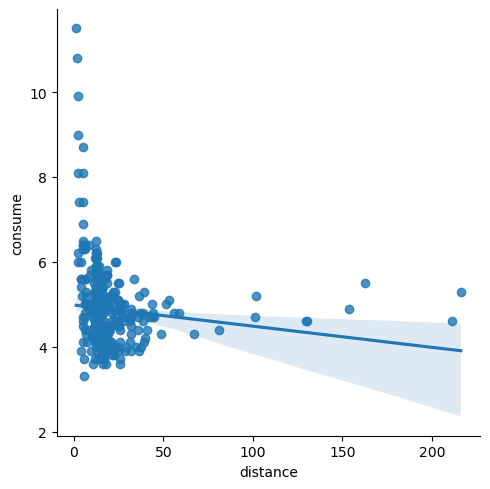

In [105]:
sns.lmplot(x = 'distance',y ='consume',data=minac)
plt.show()

# Maximum fuel consumption with AC

In [109]:
maxac= data.query('ac==1.000000')
maxac


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
40,12.4,4.0,55,21.5,7,E10,1,1,0
41,4.5,5.0,29,21.5,7,E10,1,0,0
60,2.9,7.9,18,21.5,9,SP98,1,1,0
61,2.1,12.2,23,21.5,9,SP98,1,1,0
69,11.8,4.5,37,21.5,4,SP98,1,0,0
94,11.8,5.9,21,20.0,9,SP98,1,1,0
101,26.2,5.8,71,21.0,8,SP98,1,1,0
104,12.4,5.4,18,21.0,11,SP98,1,1,0
153,17.3,5.0,61,21.5,6,E10,1,1,0
181,12.3,7.1,52,22.5,0,E10,1,1,0


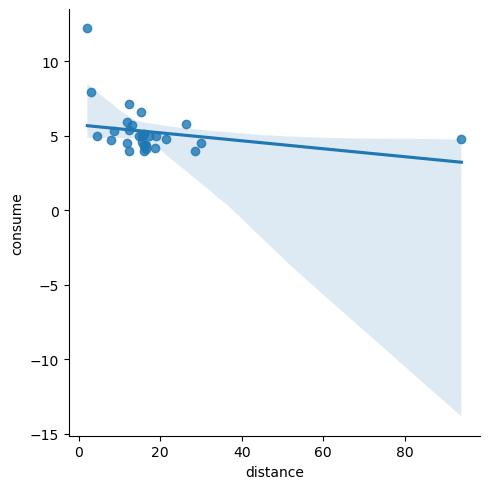

In [110]:
sns.lmplot(x = 'distance', y= 'consume',data=maxac)
plt.show()


# The different gas type used by the user

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


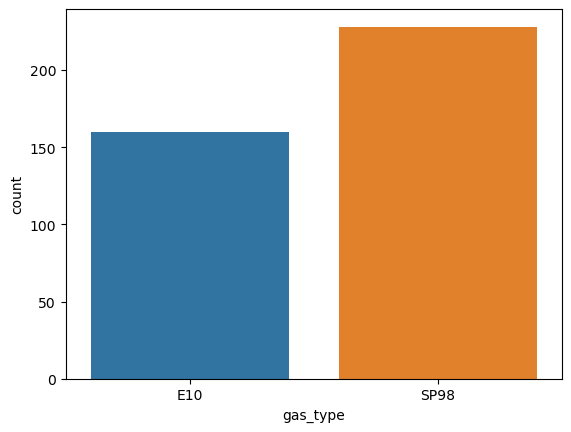

In [111]:
sns.countplot(data['gas_type'])
plt.show()

# Gas1 as E10 and Gas2 as SP98

In [113]:
gas1=data[data['gas_type']=='E10']
gas1

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
344,16.1,5.1,30,25.0,16,E10,1,1,0
345,16.0,4.0,42,22.0,15,E10,0,0,0
346,15.4,4.8,40,22.0,18,E10,0,0,0
347,17.2,3.9,35,22.0,16,E10,0,0,0


In [ ]:
gas1.describe()

# Minimum distance travel by gas 1

In [114]:
gas1mnd=gas1.query('distance==1.700000')
gas1mnd

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
147,1.7,10.8,14,21.5,10,E10,0,1,0


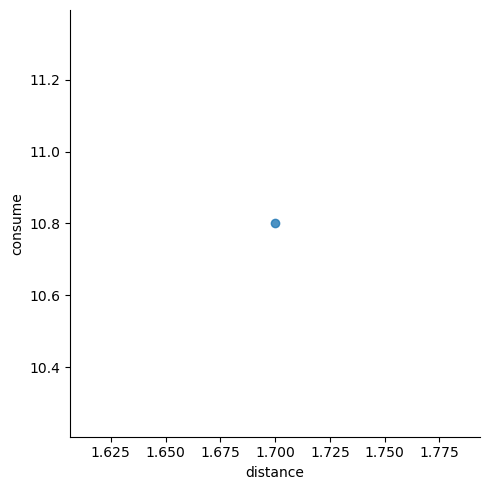

In [115]:
sns.lmplot(x = 'distance',y ='consume',data=gas1mnd)
plt.show()

# Maximum distance travel by gas1

In [116]:
gas1mxd=gas1.query('distance==130.300000')
gas1mxd

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
189,130.3,4.6,85,22.0,12,E10,0,0,0


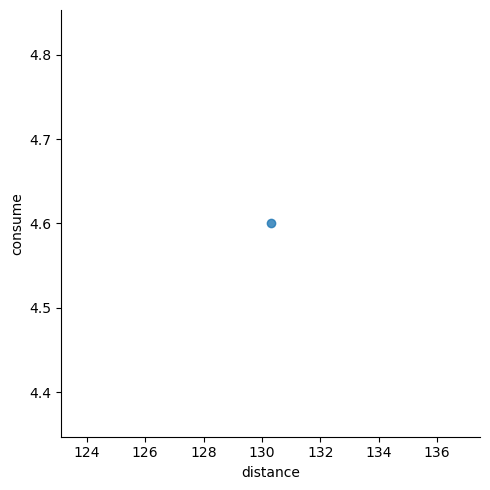

In [117]:
sns.lmplot(x = 'distance',y = 'consume',data=gas1mxd)
plt.show()

In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gas_type']=le.fit_transform(data['gas_type'])

In [120]:
data['distance']=data['distance'].astype(int)
data['consume']=data['consume'].astype(int)
data['temp_inside']=data['temp_inside'].astype(int)

In [121]:
x=data.drop(['consume','ac'],axis=1)

y=data['consume']

x

,distance,speed,temp_inside,temp_outside,gas_type,rain,sun
0,28,26,21,12,0,0,0
1,12,30,21,13,0,0,0
2,11,38,21,15,0,0,0
3,12,36,21,14,0,0,0
4,18,46,21,15,0,0,0
...,...,...,...,...,...,...,...
383,16,39,24,18,1,0,0
384,16,38,25,31,1,0,0
385,16,45,25,19,1,0,0
386,15,42,25,31,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=43)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainst=ss.fit_transform(x_train)
x_testst=ss.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_trainmn=mms.fit_transform(x_train)
x_testmn= mms.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pc=PCA(n_components=4)
x_trainpca=pc.fit_transform(x_train)
x_testpca=pc.transform(x_test)